In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [60]:
df= sns.load_dataset('titanic')

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### these are the columns which have missing value 

embarked        
embark_town     
age            
deck    
 
 

# Mean/median imputation

#### for  mean mode  and median imputation  data sholud be Missing Completely at Random, MCAR
    

When should we apply?

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [ ]:
# lets giiev it a try 

In [17]:
# as we are doing mean mode and median imputationso we wil be considering numerical columns

In [74]:
num=df.dtypes[(df.dtypes == "int64") |( df.dtypes == "float64")].index
# extracting numerical features

In [75]:
new_df = df[num]

In [76]:
new_df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [77]:
new_df.sum()

survived      342.0000
pclass       2057.0000
age         21205.1700
sibsp         466.0000
parch         340.0000
fare        28693.9493
dtype: float64

In [78]:
(new_df.isna().mean()*100).sort_values()

survived     0.00000
pclass       0.00000
sibsp        0.00000
parch        0.00000
fare         0.00000
age         19.86532
dtype: float64

In [79]:
# lets see  do imputation 

In [80]:
x=new_df.drop("survived",axis=1)
y=new_df["survived"]

In [81]:
# first we do train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
x_train.shape,x_test.shape

((712, 5), (179, 5))

In [83]:
x_train.isna().sum()

pclass      0
age       140
sibsp       0
parch       0
fare        0
dtype: int64

In [84]:
x_train.isna().mean()

pclass    0.000000
age       0.196629
sibsp     0.000000
parch     0.000000
fare      0.000000
dtype: float64

In [85]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  712 non-null    int64  
 1   age     572 non-null    float64
 2   sibsp   712 non-null    int64  
 3   parch   712 non-null    int64  
 4   fare    712 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.4 KB


In [89]:
mean_age=x_train["age"].mean()
median_age=x_train["age"].median()


In [90]:
x_train["age_median"]=x_train["age"].fillna(median_age)
x_train["age_mean"]=x_train["age"].fillna(mean_age)

In [92]:
x_train.head(10)

,pclass,age,sibsp,parch,fare,age_median,age_mean
331,1,45.5,0,0,28.5000,45.5,45.500000
733,2,23.0,0,0,13.0000,23.0,23.000000
382,3,32.0,0,0,7.9250,32.0,32.000000
704,3,26.0,1,0,7.8542,26.0,26.000000
813,3,6.0,4,2,31.2750,6.0,6.000000
118,1,24.0,0,1,247.5208,24.0,24.000000
536,1,45.0,0,0,26.5500,45.0,45.000000
361,2,29.0,1,0,27.7208,29.0,29.000000
29,3,NaN,0,0,7.8958,28.0,29.498846
55,1,NaN,0,0,35.5000,28.0,29.498846


In [93]:
# the missing value are replaced by mean and median  in the respective column

In [94]:
# after doing this you have to see
# change in varience ( as you do mean , median imputation then your varience git shrink) 

### visualization

In [104]:
print("varience orignal",x_train["age"].var())
print("varience after median imputation",x_train["age_median"].var())
print("varience after mean imputation",x_train["age_mean"].var())


varience orignal 210.2517072477438
varience after median imputation 169.20731007048096
varience after mean imputation 168.8519336687225


In [105]:
# you can see the change in varence ( it is shrinking)
# varience will shrink but it should not change drastically

#### to see the distribution

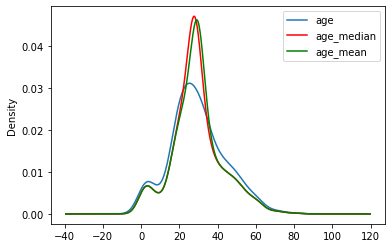

In [109]:
fig = plt.figure()

ax = fig.add_subplot(111)
# orignal 
x_train['age'].plot(kind='kde', ax=ax)
# after median imputation
x_train.age_median.plot(kind='kde', ax=ax, color='red')
# after mean imputation
x_train.age_mean.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [110]:
# this try of drastic change should not be there  (red flag)

In [112]:
x_train.cov()# checking covarience 

,pclass,age,sibsp,parch,fare,age_median,age_mean
pclass,0.679939,-4.288674,0.084329,0.008277,-23.431910,-3.536527,-3.444209
age,-4.288674,210.251707,-4.501273,-2.492052,71.580633,210.251707,210.251707
sibsp,0.084329,-4.501273,1.383927,0.410112,9.354652,-3.637141,-3.614946
parch,0.008277,-2.492052,0.410112,0.626740,9.141094,-1.950569,-2.001353
fare,-23.431910,71.580633,9.354652,9.141094,2700.831981,61.261919,57.485994
age_median,-3.536527,210.251707,-3.637141,-1.950569,61.261919,169.207310,168.851934
age_mean,-3.444209,210.251707,-3.614946,-2.001353,57.485994,168.851934,168.851934


In [113]:
# compare the values of age  with age_mean and age_medain 
# the covarience is also changing

<AxesSubplot:>

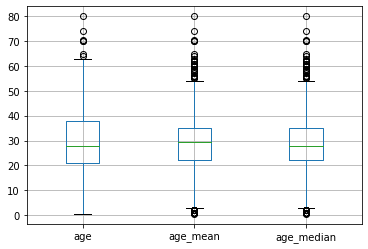

In [115]:
 x_train[["age","age_mean","age_median"]].boxplot()

In [116]:
# age  --> less outliers
# but in age_mean and age_median  the IQR range shrinked and in both the sides outliers came
# and ths is not good (red flag)

#### so we  will not use mean and median approch for age column

## Doing same think using sklearn

In [118]:
# best way to do this


In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [123]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [125]:
trf=ColumnTransformer([
    ('imputer1',imputer1,["age"]),
    ('imputer2',imputer2,["age"])
],remainder='passthrough')

In [127]:
# trf.fit_transform(x_train)
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['age']),
                                ('imputer2', SimpleImputer(), ['age'])])

In [128]:
trf.named_transformers_["imputer1"].statistics_

array([28.])

In [129]:
trf.named_transformers_["imputer2"].statistics_

array([29.49884615])

In [130]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

## note

fit on only training data 

trsnsform on both train and test data

# Arbitrary value imputation

##### data is not missing at random (MCAR)

In [131]:
# mostly used in categorical variable  but you can use it for numerical feature also
# in case of categorical replacing the nan values with "misiing" 
#  in case of numerical replacing the nan value with an arbitrary number which is not present in your dataset
# this technique is used to create a difference  between missing values and non-misiing values 
# easy to apply
# but
# pdf graph distort 
#varience change 
# covarience chnages 

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [133]:
def impute_nan(df,variable):
    df[variable+"_Zero"]=df[variable].fillna(0)
    df[variable+"_hundred"]=df[variable].fillna(100)

In [134]:
impute_nan(x_train,"age")

In [135]:
x_train

,pclass,age,sibsp,parch,fare,age_Zero,age_hundred
331,1,45.5,0,0,28.5000,45.5,45.5
733,2,23.0,0,0,13.0000,23.0,23.0
382,3,32.0,0,0,7.9250,32.0,32.0
704,3,26.0,1,0,7.8542,26.0,26.0
813,3,6.0,4,2,31.2750,6.0,6.0
...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,21.0,21.0
270,1,NaN,0,0,31.0000,0.0,100.0
860,3,41.0,2,0,14.1083,41.0,41.0
435,1,14.0,1,2,120.0000,14.0,14.0


### visualization

In [138]:
print("varience orignal",x_train["age"].var())
print("varience after age_Zero imputation",x_train["age_Zero"].var())
print("varience after age_hundred imputation",x_train["age_hundred"].var())

varience orignal 210.2517072477438
varience after age_Zero imputation 306.50456824459985
varience after age_hundred imputation 955.113269393479


In [ ]:
# varience has increased  ( too high )

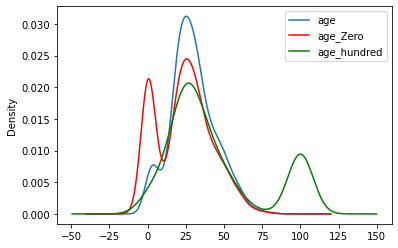

In [137]:
fig = plt.figure()

ax = fig.add_subplot(111)
# orignal 
x_train['age'].plot(kind='kde', ax=ax)
# after median imputation
x_train.age_Zero.plot(kind='kde', ax=ax, color='red')
# after mean imputation
x_train.age_hundred.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [139]:
# distribution has also chnaged 

### doing same thing using sklern

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [141]:
imputer1=SimpleImputer(strategy='constant',fill_value=0)
imputer2=SimpleImputer(strategy='constant',fill_value=100)

In [142]:
trf=ColumnTransformer([
    ('imputer1',imputer1,["age"]),
    ('imputer2',imputer2,["age"])
],remainder='passthrough')

In [143]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=100,
                                               strategy='constant'),
                                 ['age'])])

In [144]:
trf.named_transformers_["imputer1"].statistics_

array([0.])

In [145]:
trf.named_transformers_["imputer2"].statistics_

array([100.])

In [146]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

# End of Distribution imputation

In [ ]:
# see the other notebook

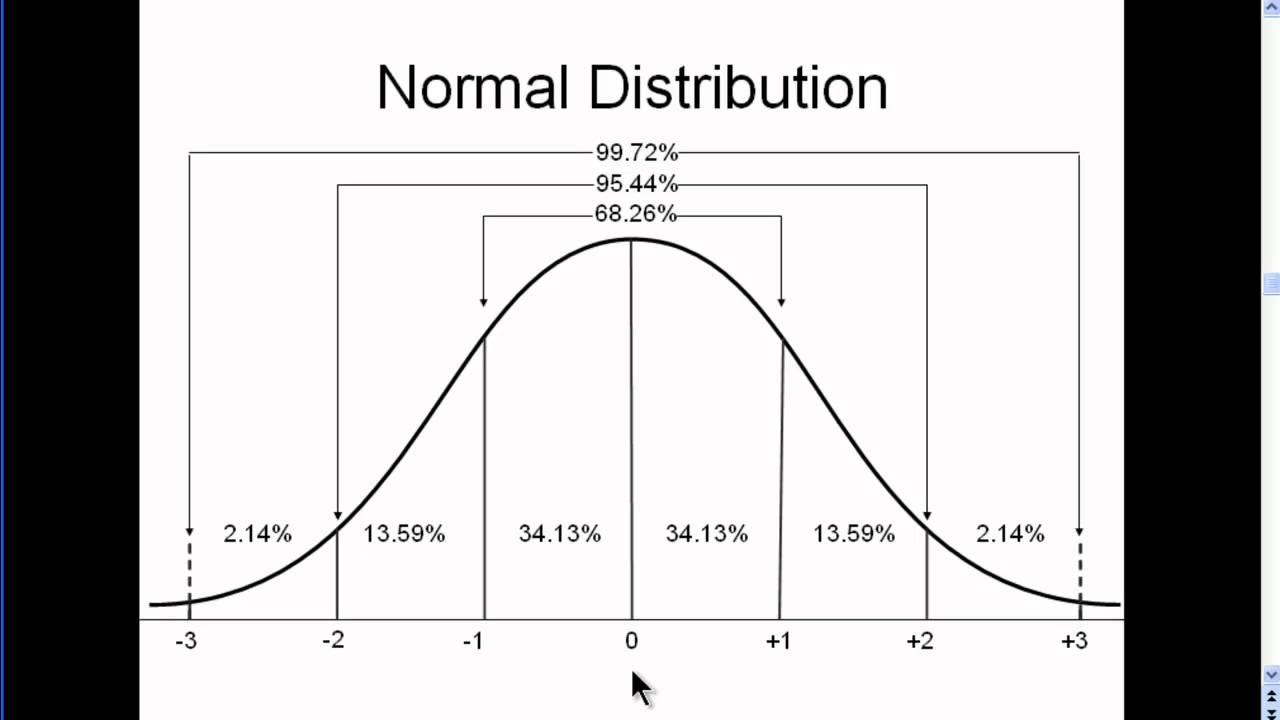

# Random imputation

In [147]:
# not in sklearn
# varience does not chnage much 
# covarience distors
# memory heavy for deployment

In [150]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [151]:

X_train


,pclass,age,sibsp,parch,fare
331,1,45.5,0,0,28.5000
733,2,23.0,0,0,13.0000
382,3,32.0,0,0,7.9250
704,3,26.0,1,0,7.8542
813,3,6.0,4,2,31.2750
...,...,...,...,...,...
106,3,21.0,0,0,7.6500
270,1,NaN,0,0,31.0000
860,3,41.0,2,0,14.1083
435,1,14.0,1,2,120.0000


In [153]:
X_train['age_imputed'] = X_train['age']
X_test['age_imputed'] = X_test['age']

In [157]:
X_train['age_imputed'][X_train['age_imputed'].isnull()] = X_train['age'].dropna().sample(X_train['age'].isnull().sum()).values
X_test['age_imputed'][X_test['age_imputed'].isnull()] = X_train['age'].dropna().sample(X_test['age'].isnull().sum()).values

In [159]:
X_train['age'].dropna().sample(X_train['age'].isnull().sum()).values
# it is generating random values to fill  the nan values

array([32.  , 35.  , 64.  , 52.  , 17.  , 36.  , 40.5 , 54.  , 28.  ,
       21.  , 39.  ,  9.  , 32.  , 21.  , 32.  , 23.  , 17.  ,  2.  ,
       60.  , 24.  , 44.  ,  7.  ,  3.  , 24.  , 45.  , 45.  , 61.  ,
       40.  , 38.  , 34.  , 23.  , 25.  ,  9.  , 40.  , 46.  , 39.  ,
       47.  , 51.  , 21.  , 29.  , 35.  , 65.  , 20.  , 36.  , 58.  ,
       47.  , 31.  , 21.  , 35.  , 50.  , 29.  , 26.  , 49.  , 70.  ,
       28.  , 74.  , 40.5 , 17.  , 44.  , 30.  , 19.  , 31.  ,  2.  ,
       20.  , 48.  , 62.  , 26.  ,  2.  , 55.  ,  8.  , 18.  , 22.  ,
       22.  , 17.  , 55.  , 27.  ,  0.67, 24.  , 42.  , 20.  ,  1.  ,
       24.  , 43.  , 33.  , 38.  , 24.  ,  7.  , 51.  , 26.  , 32.5 ,
       30.  ,  9.  , 41.  , 39.  , 21.  , 19.  , 30.  , 24.  , 47.  ,
       14.  , 45.5 , 33.  , 58.  , 22.  , 19.  , 25.  , 56.  , 27.  ,
       34.  , 21.  , 22.  , 20.  , 22.  , 22.  , 25.  , 39.  , 29.  ,
       23.  , 18.  , 28.  , 28.5 , 33.  , 24.  , 36.  , 26.  , 28.  ,
       45.  , 28.  ,

In [161]:
X_train['age'].isnull().sum() # gives you how many null vlaues we have to impute

140

In [162]:
X_train

,pclass,age,sibsp,parch,fare,age_imputed
331,1,45.5,0,0,28.5000,45.5
733,2,23.0,0,0,13.0000,23.0
382,3,32.0,0,0,7.9250,32.0
704,3,26.0,1,0,7.8542,26.0
813,3,6.0,4,2,31.2750,6.0
...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,21.0
270,1,NaN,0,0,31.0000,33.0
860,3,41.0,2,0,14.1083,41.0
435,1,14.0,1,2,120.0000,14.0


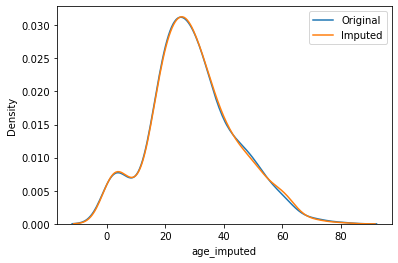

In [164]:
sns.distplot(X_train['age'],label='Original',hist=False)
sns.distplot(X_train['age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [165]:
# distribution has not chnaged much

In [167]:

print('Original variable variance: ', X_train['age'].var())
print('Variance after random imputation: ', X_train['age_imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  211.00403909492127


In [169]:
X_train[['age', 'age_imputed']].cov()

,age,age_imputed
age,210.251707,210.251707
age_imputed,210.251707,211.004039


<AxesSubplot:>

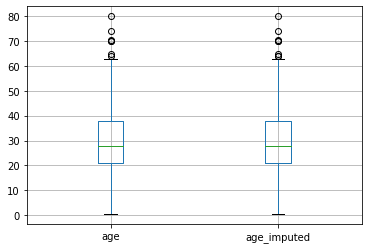

In [172]:
X_train[['age', 'age_imputed']].boxplot()
# no effect on outliers

In [174]:
# note as we are doing random sampling 
# everty im we not give the vakue of age then it will randmly impute  --> wheter the outher feature are same or not
# what it do .. for same other feature  and missing  vale of age --> it will give diff output
# so you can avoid it by giving  random_state=int(observation['Feature_name']

In [175]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Feature_name']